In [1]:
import sys
from joblib import load
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')

from reimplemented_approaches.proactive_conformance_checking.data_prep_split_encode import PrefixDataset
from reimplemented_approaches.proactive_conformance_checking.models import LSTMCollectiveIDP
from reimplemented_approaches.proactive_conformance_checking.evaluation import PredictionResults, Metrics

In [2]:
data_dir = "../../data_preparation/Helpdesk/collective/"
path_model = "../../training/Helpdesk/collective/LSTM_collecctive_IDP.pkl"

In [3]:
_, _, test_set = PrefixDataset.load_datasets(save_path=data_dir)

encoders = load(data_dir+"/encoders.pkl")

deviations = encoders.get("deviations")
print(deviations)

["y_('>>', 'Assign seriousness')", "y_('Create SW anomaly', '>>')", "y_('Require upgrade', '>>')", "y_('Resolve ticket', '>>')", "y_('Take in charge ticket', '>>')", "y_('Wait', '>>')"]


In [4]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')
print(f"Evaluating on {device}")

Evaluating on cpu


In [5]:
model = LSTMCollectiveIDP.load(path_model, device=device)

In [6]:
pr = PredictionResults(model=model, test_set=test_set)
probs, preds, targets = pr.get_predictions_targets()
# print(preds)
# print(targets)
# print(probs)

In [7]:
m = Metrics(preds=preds, targets=targets)

In [8]:
res_dev = m.macro_precision_recall_dev()
print(res_dev)

{'precision_per_label': array([0., 0., 0., 0., 0., 0.]), 'recall_per_label': array([0., 0., 0., 0., 0., 0.]), 'macro_precision': 0.0, 'macro_recall': 0.0}


In [9]:
res_no_dev = m.macro_precision_recall_no_dev()
print(res_no_dev)

{'precision_per_label_non_deviation': array([0.9980326 , 0.99775155, 0.99100618, 0.96318156, 0.96318156,
       0.93689389]), 'recall_per_label_non_deviation': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99985001]), 'macro_precision_non_deviation': 0.9750078905257205, 'macro_recall_non_deviation': 0.9999750012499375}


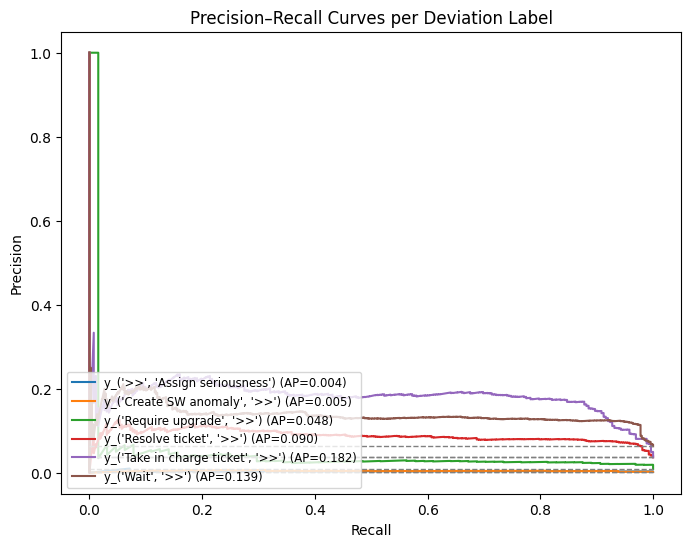

{'per_label_ap': array([0.00406499, 0.00468451, 0.04777615, 0.08957042, 0.18207763,
       0.13884187]), 'macro_ap': 0.07783592768200448}


In [10]:
pr_auc = m.plot_macro_pr_auc(prob_scores=probs, label_names=deviations)
print(pr_auc)